# CS-430 Homework 1
### Anas Puthawala

#### Merge-Sort Implementation

In [2]:
from random import randint
from datetime import datetime
import matplotlib.pylab as plt
import random

import timeit
import numpy as np

import math

In [3]:
def merge_sort(A):
    merge_sort2(A, 0, len(A)-1)

In [4]:
def merge_sort2(A, p, r):
    if p < r:
        q = (p+r) // 2
        merge_sort2(A, p, q)
        merge_sort2(A, q+1, r)
        merge(A, p, q, r)

In [5]:
def merge(A, p, q, r):
    f = []
    n1 = q-p + 1
    n2 = r-q
    
    L = [0] * (n1+1)
    R = [0] * (n2+1)
    
    for i in range(1, n1+1):
        L[i] = A[p+i-1]
    for j in range(1, n2+1):
        R[j] = A[q+j]
        
    L.append(99999999)
    R.append(99999999)
    
    i=j=1
    
    for k in range(p, r+1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i+=1
            
        else:
            A[k] = R[j]
            j+=1

### The empirical method of seeing wether or not merge_sort can be seen as nlogn is as follows:
1. Populate 'x' amount of lists beforehand (x in this case is set at 1000). Random floats will be initialized using the np.random.randn function. Further, the absolute value will be taken to get rid of any negatives (np.abs).


2. These lists will be appended into the big list ('lst') which will be indexed during the actual timing.


3. There will be another for loop which will iterate from 1, x-1 times. It will start the timer, call the merge_sort function up above, then end the timer and append the difference between end-time and start-time in the 'ts' list. This difference is the time it took for the function to run


4. The 'ts' will be plotted against 'ns' which is simply the length of the list. In essence, we'll be able to see wether or not as the length of the list increases, how does the time it takes to call merge_sort change?


5. We will compare the plot recieved from 'ts' and 'ns' with a few other plots (which were respectively scaled down to address any magnitude concerns). For example, if you scroll down you'll see we also plot o(n) and o(logn) and o(n^2) and we expect a plot such as this to appear:
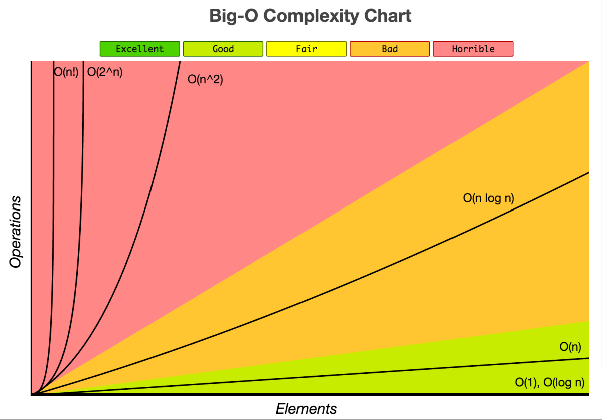
                                                             Figure 1.0

#### Code to generate 'lst' a list of lists that grow with respect to their index and have random floats in unsorted order (to be used with merge_sort)

In [56]:
lst = []
x = 1000
random.seed(datetime.now())
[lst.append(np.abs(np.random.randn(i))) for i in range(1, x)];

#### Recording the time it took for merge_sort to be called on each list

In [57]:
ns = []
ts = []
for i in range(1, x-1):
    start_time = timeit.default_timer()
    merge_sort(lst[i])
    end_time = timeit.default_timer()
    ts.append(end_time-start_time)

In [58]:
ns = [i for i in range(1, x-1)]

#### Plotting and visualizing the performance (time complexity)

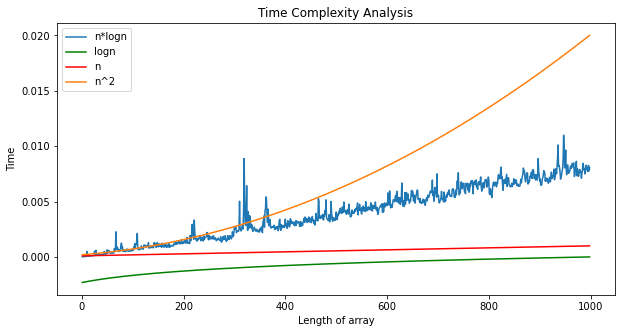

In [59]:
plt.figure(figsize=(10,5))
plt.plot(ns, ts); # Merge-sort data, nlogn expected
plt.title('Time Complexity Analysis');
plt.ylabel('Time');
plt.xlabel('Length of array');
ns2 = [n**2 for n in ns]

xs = np.linspace(0.1, 1, 998)

ys_log = [(.001*math.log(1*x)) + 0 for x in xs] #logn data
plt.plot(ns, ys_log, '-g'); #logn data

ys_n = [.001*x for x in xs] #o(n) data
plt.plot(ns, ys_n, '-r') #o(n) data

ys_n2 = [.02*(x**2) for x in xs]; #o(n^2) data
plt.plot(ns, ys_n2); #o(n^2) data

plt.legend(['n*logn','logn', 'n', 'n^2']); #Legend

# plt.plot(ns, ns2)
# plt.plot(ns, ns)

### Conclusion:

We can conclude a few things:

* Merge-sort is indeed o(nlogn) as seen from the empirical proof in the plot above and its comparison to figure 1.0
* Some scaling had to be considered to make the plots properly line up.
* No random number generator was needed because we'd generate all the numbers in one go and append them all into the list 'lst'